# GRIP - The Spark Foundation


# Data Science & Business Analytics Intern


# Author: Achal Dhote

# Task 2: Prediction using Unsupervised ML
● From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 
● Use R or Python or perform this task
● Dataset : https://bit.ly/3kXTdox

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
df=pd.read_csv('Iris.csv')

In [55]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [58]:
df.shape

(150, 6)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
# Normalization function
data=df.iloc[:,[0,1,2,3]].values
data

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [63]:
kmeans.inertia_

17758.79250355619

In [64]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(data, kmeans.labels_))
    

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
wcss

[281831.54466666665,
 70581.38079999998,
 31320.711200000005,
 17758.79250355619,
 11468.96874702381,
 7921.863473076924,
 5911.63236551854,
 4541.979023391813,
 3571.9110955882356,
 2943.9331008403365]

In [66]:
sil_score

[0.6205786765196579,
 0.5820898597618552,
 0.5568629228470894,
 0.540632090367279,
 0.5320839368197162,
 0.5203730687616972,
 0.5105694596667403,
 0.5089699878991417,
 0.49892401057504343]

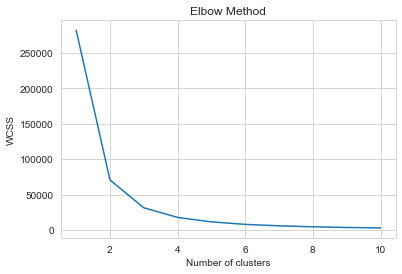

In [67]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
#Build Cluster algorithm
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(data)

KMeans(n_clusters=5, random_state=42)

In [69]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [70]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [71]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3


In [72]:
# These are Standardized values
clusters_new.cluster_centers_

array([[106.        ,   6.27931034,   2.86551724,   5.13793103],
       [ 46.5       ,   5.35666667,   3.16666667,   2.48666667],
       [ 16.        ,   5.01935484,   3.43870968,   1.47741935],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 76.5       ,   5.99666667,   2.77      ,   4.33      ]])

In [73]:
#Univ.groupby('clusterid_new').agg(['mean']).reset_index()
df.groupby('clusterid_new').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clusterid_new,,,,,
0,106.0,6.279310,2.865517,5.137931,1.793103
1,46.5,5.356667,3.166667,2.486667,0.646667
2,16.0,5.019355,3.438710,1.477419,0.245161
3,135.5,6.606667,3.010000,5.483333,2.013333
4,76.5,5.996667,2.770000,4.330000,1.346667


In [74]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3


In [75]:
df[df['clusterid_new']==3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
120,121,6.9,3.2,5.7,2.3,Iris-virginica,3
121,122,5.6,2.8,4.9,2.0,Iris-virginica,3
122,123,7.7,2.8,6.7,2.0,Iris-virginica,3
123,124,6.3,2.7,4.9,1.8,Iris-virginica,3
124,125,6.7,3.3,5.7,2.1,Iris-virginica,3
125,126,7.2,3.2,6.0,1.8,Iris-virginica,3
126,127,6.2,2.8,4.8,1.8,Iris-virginica,3
127,128,6.1,3.0,4.9,1.8,Iris-virginica,3
128,129,6.4,2.8,5.6,2.1,Iris-virginica,3
129,130,7.2,3.0,5.8,1.6,Iris-virginica,3


In [76]:
df[df['clusterid_new']==0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,0
92,93,5.8,2.6,4.0,1.2,Iris-versicolor,0
93,94,5.0,2.3,3.3,1.0,Iris-versicolor,0
94,95,5.6,2.7,4.2,1.3,Iris-versicolor,0
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,0
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,0
100,101,6.3,3.3,6.0,2.5,Iris-virginica,0


In [77]:
df.sort_values('clusterid_new')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusterid_new
117,118,7.7,3.8,6.7,2.2,Iris-virginica,0
116,117,6.5,3.0,5.5,1.8,Iris-virginica,0
119,120,6.0,2.2,5.0,1.5,Iris-virginica,0
118,119,7.7,2.6,6.9,2.3,Iris-virginica,0
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,0
...,...,...,...,...,...,...,...
86,87,6.7,3.1,4.7,1.5,Iris-versicolor,4
87,88,6.3,2.3,4.4,1.3,Iris-versicolor,4
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,4
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,4


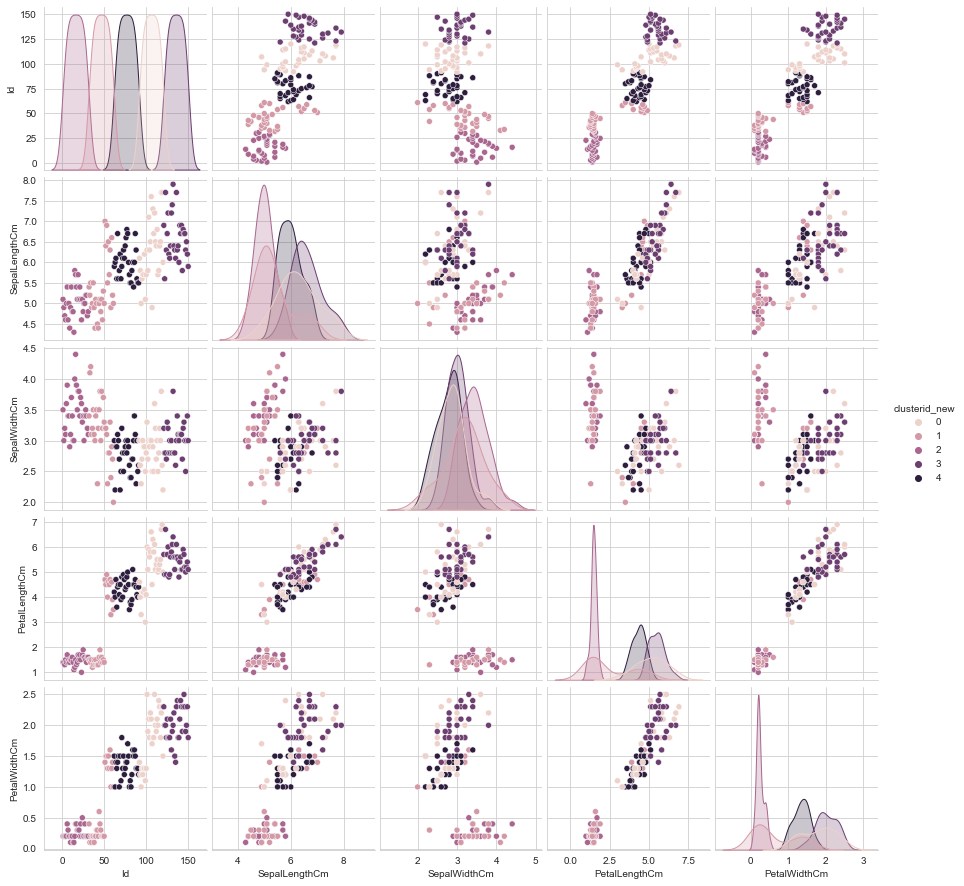

In [78]:
# pairplot
sns.set_style('whitegrid')
sns.pairplot(df, hue='clusterid_new');

# PairPlot insights
1.petalLengthCm and petalWidthCm seem to be positively correlated(seem to be having a linear relationship).

2.Iris-Setosa seems to have smaller petal length and petal width as compared to others.

3.Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.

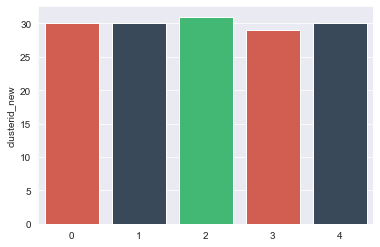

In [84]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = df["clusterid_new"] .unique(),
            y = df["clusterid_new"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));